In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [24]:
env='InvertedDoublePendulum-v4'
df_comper = pd.DataFrame()
for i in range(1,4):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER-DDPG"
print(df_comper.shape)

(23377, 17)


In [25]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"

In [26]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedDoublePendulum-v4,12-09-2023 11:40:25,14,0,14,0.000696,1,15,True,129.139370,129.139370,129.139370,129.139370,129.139370,COMPER-DDPG
1,1,2,InvertedDoublePendulum-v4,12-09-2023 11:40:42,23,0,23,0.001143,2,10,True,82.562226,105.850798,105.850798,105.850798,105.850798,COMPER-DDPG
2,1,3,InvertedDoublePendulum-v4,12-09-2023 11:40:56,29,0,29,0.001441,3,7,True,54.861377,88.854325,88.854325,88.854325,88.854325,COMPER-DDPG
3,1,4,InvertedDoublePendulum-v4,12-09-2023 11:41:07,35,0,35,0.001740,4,7,True,54.597481,80.290114,80.290114,80.290114,80.290114,COMPER-DDPG
4,1,5,InvertedDoublePendulum-v4,12-09-2023 11:41:20,41,0,41,0.002038,5,7,True,54.481999,75.128491,75.128491,75.128491,75.128491,COMPER-DDPG


In [27]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedDoublePendulum-v4,03-10-2023 15:23:42,8,9,0,0.000398,1,9,True,73.130075,73.130075,73.130075,73.130075,73.130075,DDPG
1,1,2,InvertedDoublePendulum-v4,03-10-2023 15:23:42,14,15,0,0.000696,2,7,True,54.459057,63.794566,63.794566,63.794566,63.794566,DDPG
2,1,3,InvertedDoublePendulum-v4,03-10-2023 15:23:43,19,20,0,0.000944,3,6,True,45.558473,57.715868,57.715868,57.715868,57.715868,DDPG
3,1,4,InvertedDoublePendulum-v4,03-10-2023 15:23:43,23,24,0,0.001143,4,5,True,36.210419,52.339506,52.339506,52.339506,52.339506,DDPG
4,1,5,InvertedDoublePendulum-v4,03-10-2023 15:23:44,27,28,0,0.001342,5,5,True,36.299361,49.131477,49.131477,49.131477,49.131477,DDPG


In [28]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedDoublePendulum-v4,12-09-2023 11:40:25,14,0,14,0.000696,1,15,True,129.139370,129.139370,129.139370,129.139370,129.139370,COMPER-DDPG
1,1,2,InvertedDoublePendulum-v4,12-09-2023 11:40:42,23,0,23,0.001143,2,10,True,82.562226,105.850798,105.850798,105.850798,105.850798,COMPER-DDPG
2,1,3,InvertedDoublePendulum-v4,12-09-2023 11:40:56,29,0,29,0.001441,3,7,True,54.861377,88.854325,88.854325,88.854325,88.854325,COMPER-DDPG
3,1,4,InvertedDoublePendulum-v4,12-09-2023 11:41:07,35,0,35,0.001740,4,7,True,54.597481,80.290114,80.290114,80.290114,80.290114,COMPER-DDPG
4,1,5,InvertedDoublePendulum-v4,12-09-2023 11:41:20,41,0,41,0.002038,5,7,True,54.481999,75.128491,75.128491,75.128491,75.128491,COMPER-DDPG


In [29]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
5209,5,5210,InvertedDoublePendulum-v4,04-10-2023 00:48:49,49972,49973,0,0.999,4982,10,True,82.969474,90.828638,91.638338,75.252359,83.805749,DDPG
5210,5,5211,InvertedDoublePendulum-v4,04-10-2023 00:48:50,49981,49982,0,0.999,4983,10,True,82.553178,90.827050,91.075658,75.060612,84.669659,DDPG
5211,5,5212,InvertedDoublePendulum-v4,04-10-2023 00:48:51,49989,49990,0,0.999,4984,9,True,73.452972,90.823717,90.701133,74.501086,83.721213,DDPG
5212,5,5213,InvertedDoublePendulum-v4,04-10-2023 00:48:53,49999,50000,0,0.999,4985,11,True,92.140481,90.823969,90.421183,75.222879,81.876646,DDPG
5213,5,5214,InvertedDoublePendulum-v4,04-10-2023 00:48:53,50000,50001,0,0.999,4986,2,True,9.317474,90.808337,89.594420,73.191911,74.492201,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

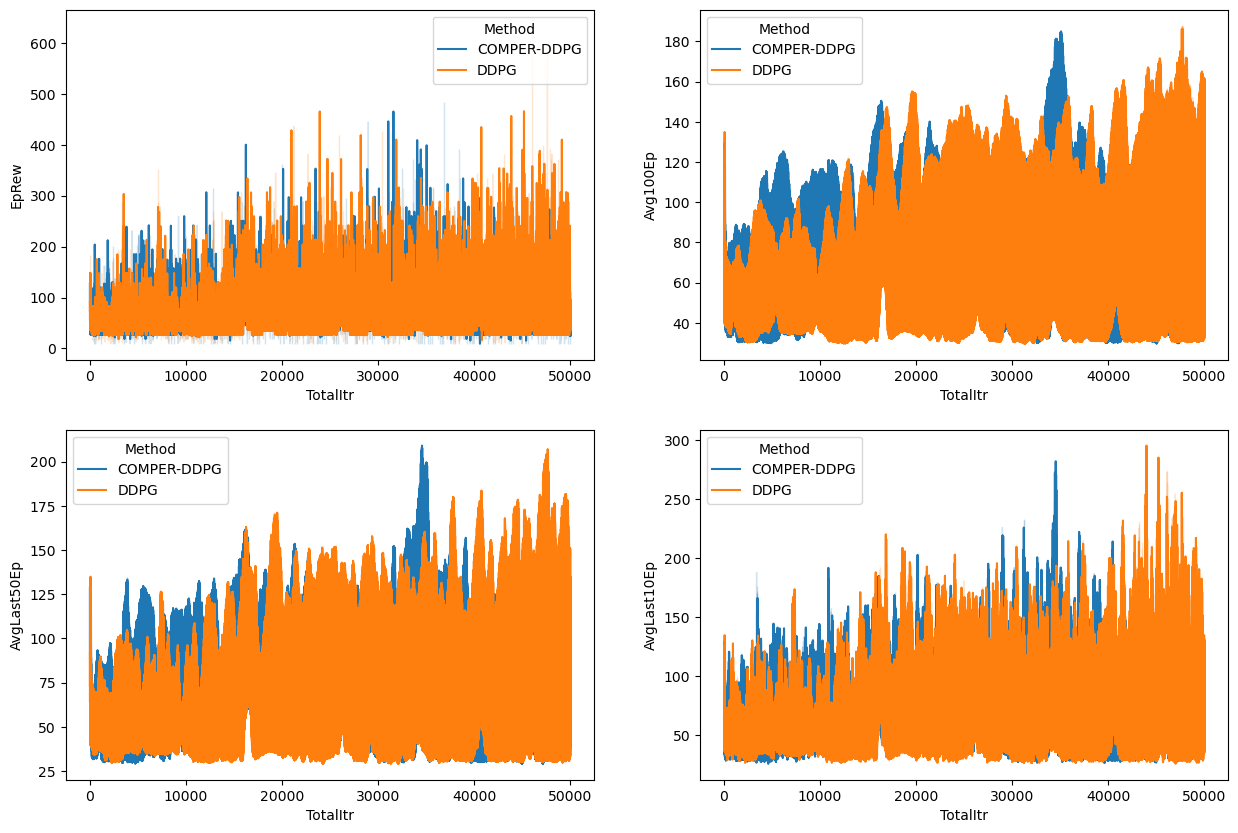

In [30]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [31]:
path ='COMPER_DDPG/data_using_done/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER-DDPG"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,6,12-09-2023 15:24:28,InvertedDoublePendulum-v4,5000,27.514516,COMPER-DDPG
1,6,12-09-2023 19:11:13,InvertedDoublePendulum-v4,10000,51.026582,COMPER-DDPG
2,6,12-09-2023 22:58:13,InvertedDoublePendulum-v4,15000,41.665230,COMPER-DDPG
3,6,13-09-2023 02:46:03,InvertedDoublePendulum-v4,20000,41.583770,COMPER-DDPG
4,6,13-09-2023 06:37:54,InvertedDoublePendulum-v4,25000,51.463325,COMPER-DDPG


In [32]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,03-10-2023 15:33:46,InvertedDoublePendulum-v4,5000,22.723607,DDPG
1,1,03-10-2023 15:44:02,InvertedDoublePendulum-v4,10000,22.613149,DDPG
2,1,03-10-2023 15:54:36,InvertedDoublePendulum-v4,15000,41.423475,DDPG
3,1,03-10-2023 16:05:26,InvertedDoublePendulum-v4,20000,22.382892,DDPG
4,1,03-10-2023 16:16:31,InvertedDoublePendulum-v4,25000,22.541846,DDPG


In [33]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

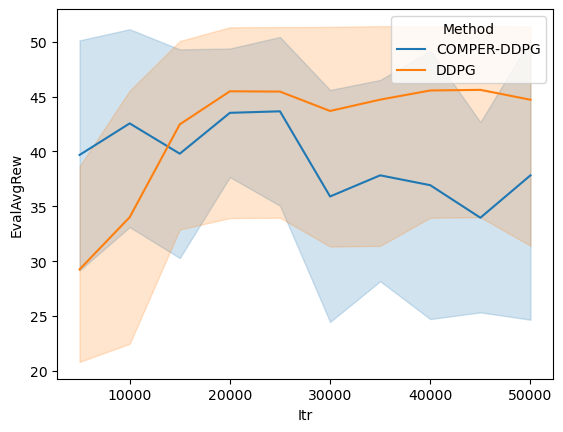

In [34]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [35]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,395,36.312166,COMPER-DDPG,35.600926
100,399,35.637585,COMPER-DDPG,34.665909
101,400,9.215769,COMPER-DDPG,33.932444
102,403,35.432375,COMPER-DDPG,33.738154
103,407,35.877720,COMPER-DDPG,33.550956


In [36]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,495,82.508364,DDPG,45.211526
100,500,45.756652,DDPG,44.937792
101,507,64.040719,DDPG,45.033609
102,514,64.237156,DDPG,45.220396
103,522,73.557055,DDPG,45.593862


In [37]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,395,36.312166,COMPER-DDPG,35.600926
100,399,35.637585,COMPER-DDPG,34.665909
101,400,9.215769,COMPER-DDPG,33.932444
102,403,35.432375,COMPER-DDPG,33.738154
103,407,35.877720,COMPER-DDPG,33.550956


In [38]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
5209,49972,82.969474,DDPG,91.638338
5210,49981,82.553178,DDPG,91.075658
5211,49989,73.452972,DDPG,90.701133
5212,49999,92.140481,DDPG,90.421183
5213,50000,9.317474,DDPG,89.594420


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

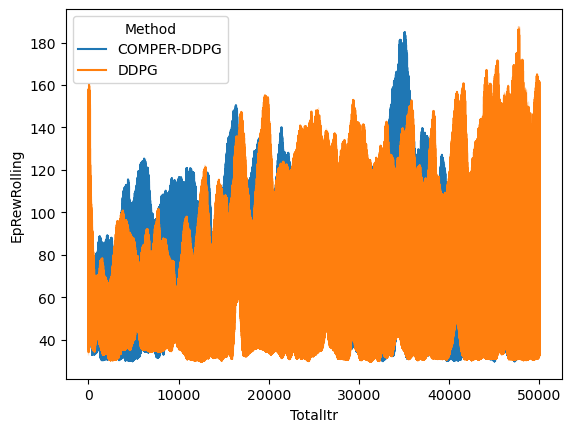

In [39]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [40]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,51.026582,COMPER-DDPG,39.270549
2,15000,41.665230,COMPER-DDPG,46.345906
3,20000,41.583770,COMPER-DDPG,41.624500
4,25000,51.463325,COMPER-DDPG,46.523548
5,30000,32.234092,COMPER-DDPG,41.848708


In [41]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,22.613149,DDPG,22.668378
2,15000,41.423475,DDPG,32.018312
3,20000,22.382892,DDPG,31.903184
4,25000,22.541846,DDPG,22.462369
5,30000,18.054990,DDPG,20.298418


<Axes: xlabel='Int', ylabel='EpRewRolling'>

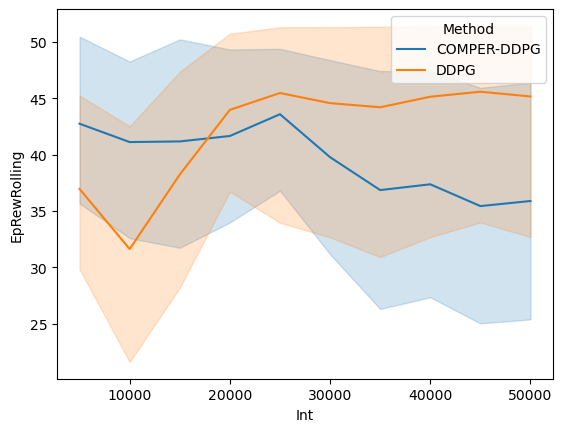

In [42]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

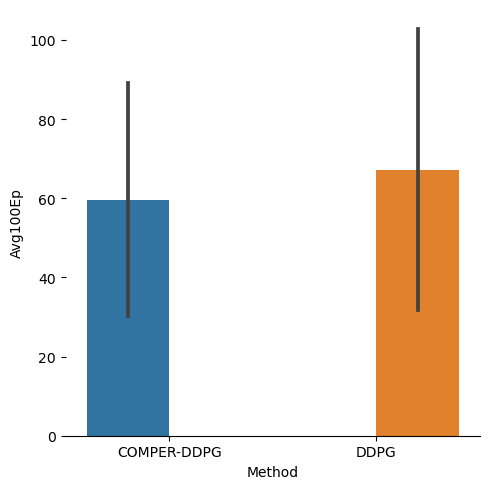

In [43]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

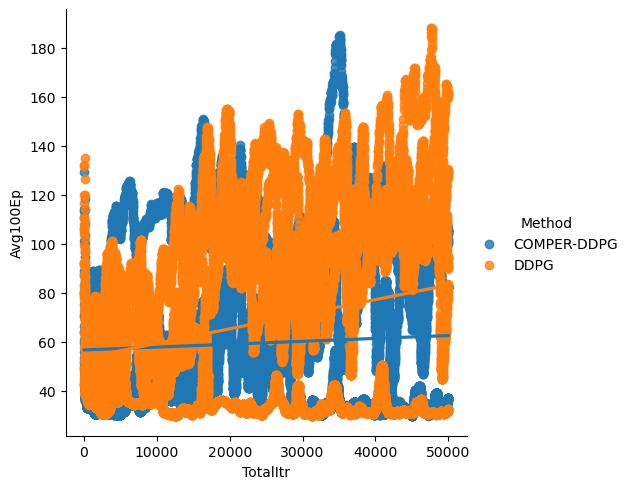

In [44]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)